In [ ]:
import math

def classifyAPoint(points,p,k=3):
	'''
	This function finds the classification of p using
	k nearest neighbor algorithm. It assumes only two
	groups and returns 0 if p belongs to group 0, else
	1 (belongs to group 1).

	Parameters -
		points: Dictionary of training points having two keys - 0 and 1
				Each key have a list of training data points belong to that

		p : A tuple, test data point of the form (x,y)

		k : number of nearest neighbour to consider, default is 3
	'''

	distance=[]
	for group in points:
		for feature in points[group]:

			#calculate the euclidean distance of p from training points
			euclidean_distance = math.sqrt((feature[0]-p[0])**2 +(feature[1]-p[1])**2)

			# Add a tuple of form (distance,group) in the distance list
			distance.append((euclidean_distance,group))

	# sort the distance list in ascending order
	# and select first k distances
	distance = sorted(distance)[:k]

	freq1 = 0 #frequency of group 0
	freq2 = 0 #frequency og group 1

	for d in distance:
		if d[1] == 0:
			freq1 += 1
		elif d[1] == 1:
			freq2 += 1

	return 0 if freq1>freq2 else 1

In [ ]:
# driver function
def main():

	# Dictionary of training points having two keys - 0 and 1
	# key 0 have points belong to class 0
	# key 1 have points belong to class 1

	points = {0:[(1,12),(2,5),(3,6),(3,10),(3.5,8),(2,11),(2,9),(1,7)],
			1:[(5,3),(3,2),(1.5,9),(7,2),(6,1),(3.8,1),(5.6,4),(4,2),(2,5)]}

	# testing point p(x,y)
	p = (2.5,7)

	# Number of neighbours
	k = 3

	print("The value classified to unknown point is: {}".\
		format(classifyAPoint(points,p,k)))

if __name__ == '__main__':
	main()

The value classified to unknown point is: 0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np

In [ ]:
iris = load_iris()


In [ ]:
iris_df =  pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris_df.isnull().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool

In [ ]:
X= iris_df.iloc[:,:-1]
y= iris_df['target']

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [ ]:
from sklearn.preprocessing import Normalizer
sdscaler = Normalizer()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 43)

In [ ]:
print(f"Test size :{X_train.shape[0]}")

Test size :120


In [ ]:
import seaborn as sns

Text(0.5, 1.08, 'Pair Plot of the dataset Before standard scaling')

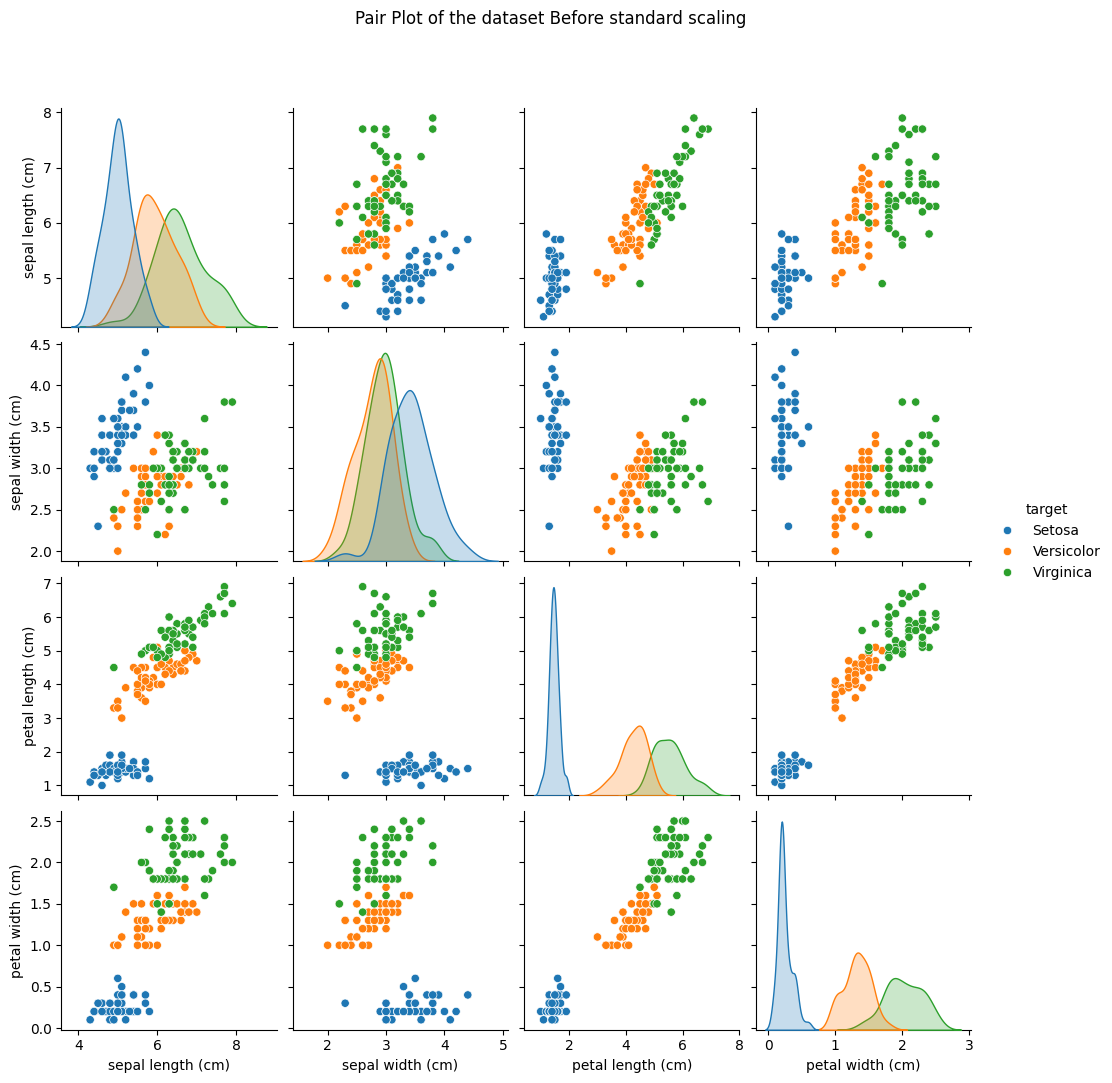

In [ ]:
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before standard scaling', y=1.08)

In [ ]:
sdscaler= Normalizer().fit(X_train)

In [ ]:
X_train_scale = sdscaler.transform(X_train)
X_test_scale= sdscaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)

In [ ]:
knn.fit(X_train_scale,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris = pd.DataFrame(iris.data,columns = iris.feature_names)

In [ ]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
import matplotlib.pyplot as plt

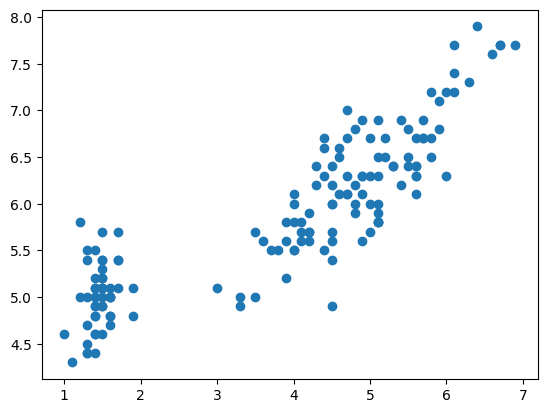

In [ ]:
plt.scatter(iris['petal length (cm)'],iris['sepal length (cm)'])
plt.show()

In [ ]:
x = iris['petal length (cm)']
y = iris['petal width (cm)']
z = iris['sepal length (cm)']
p = iris['sepal width (cm)']
li = [x,y,z,p]

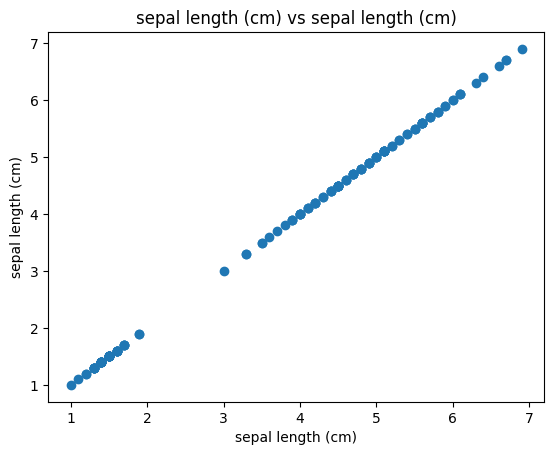

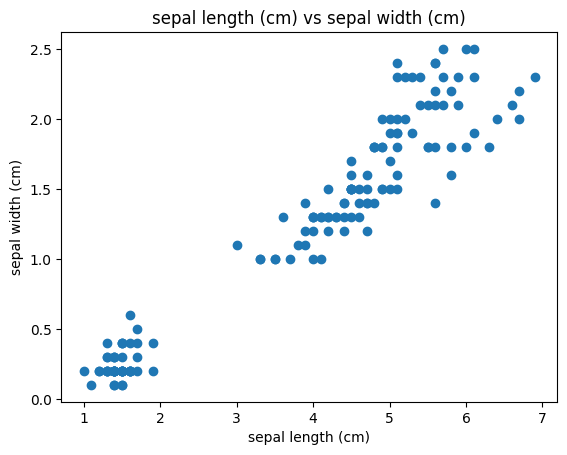

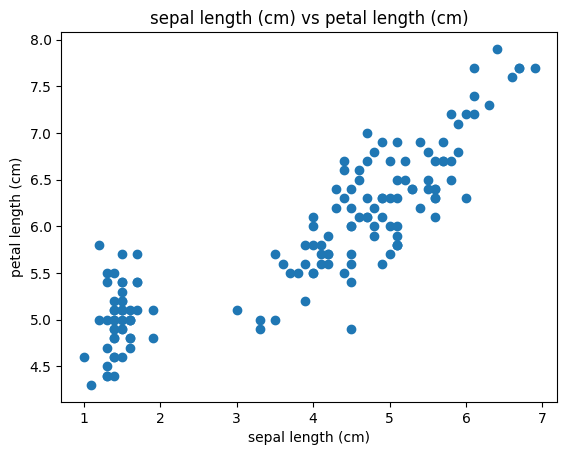

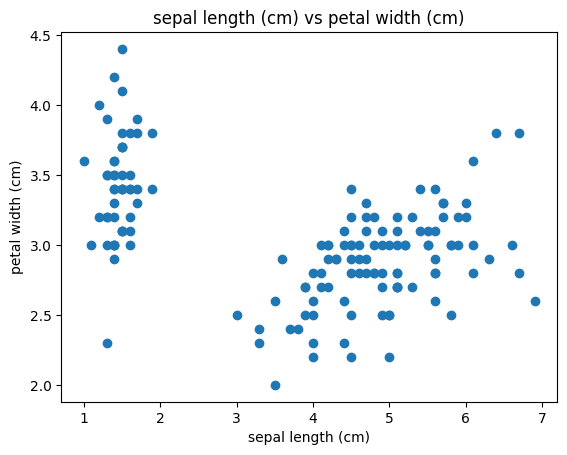

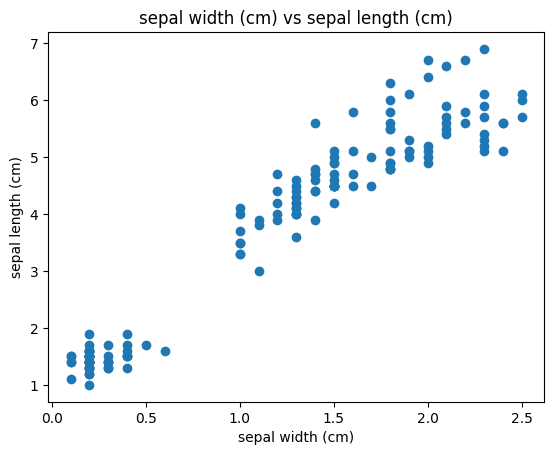

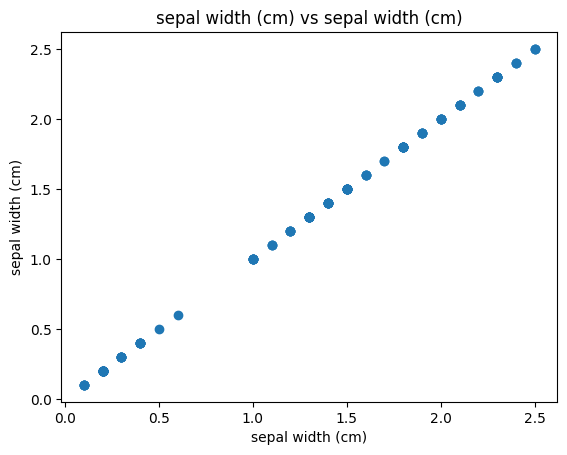

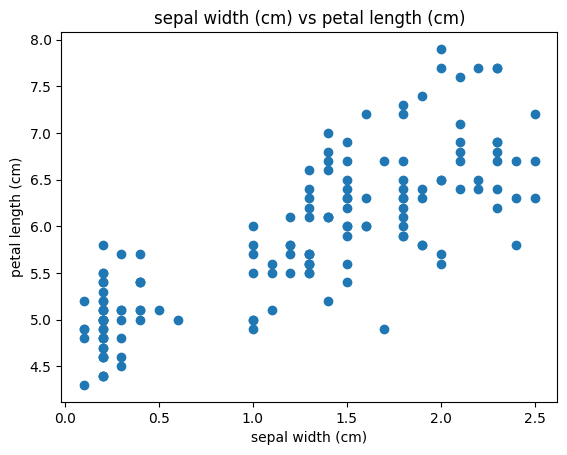

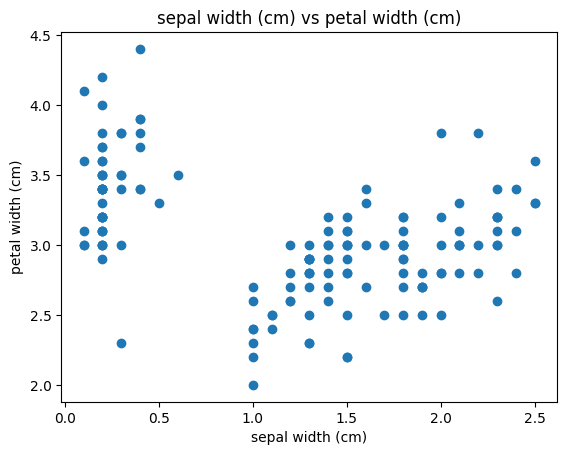

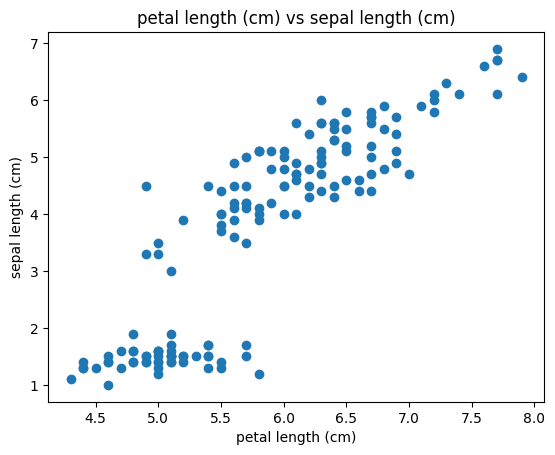

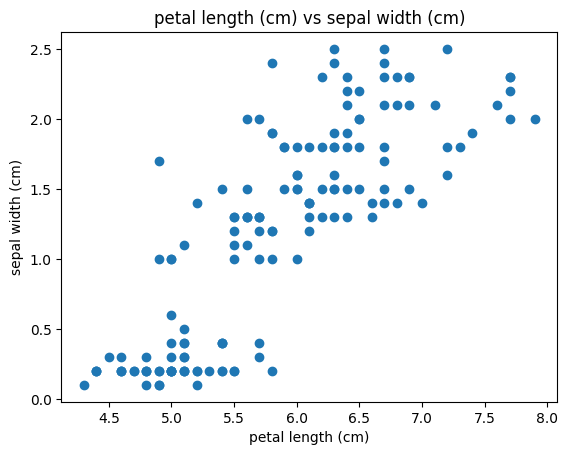

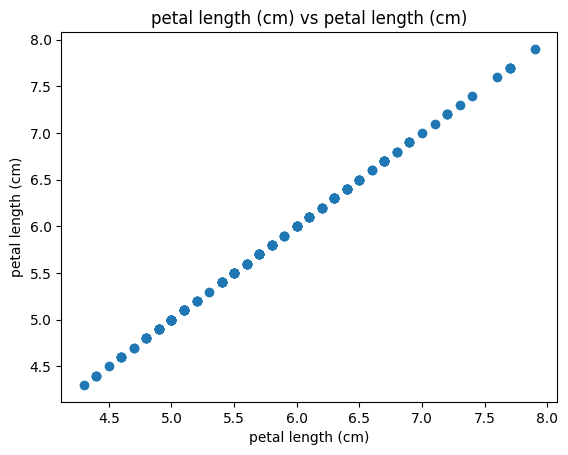

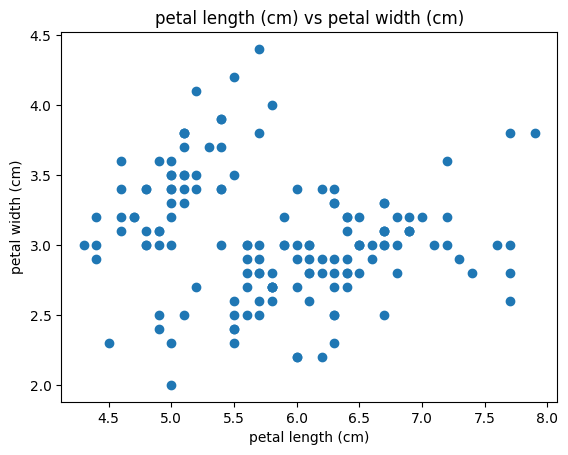

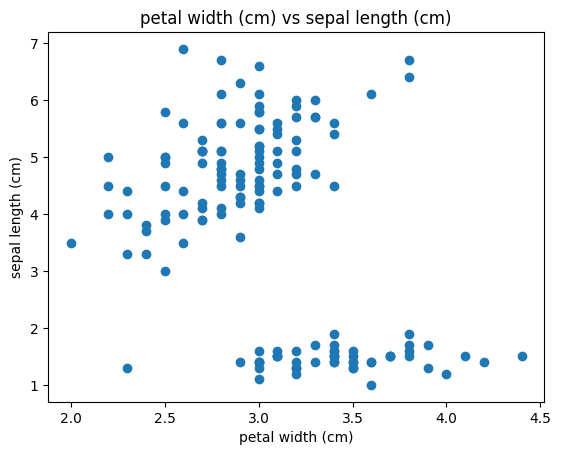

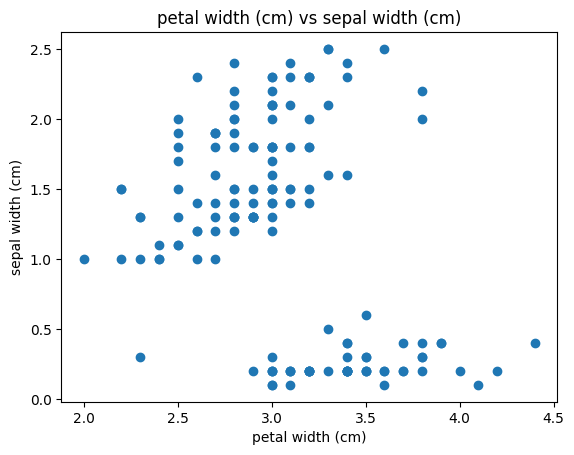

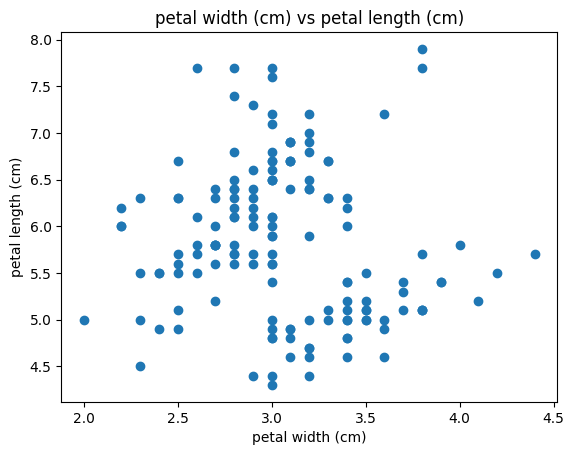

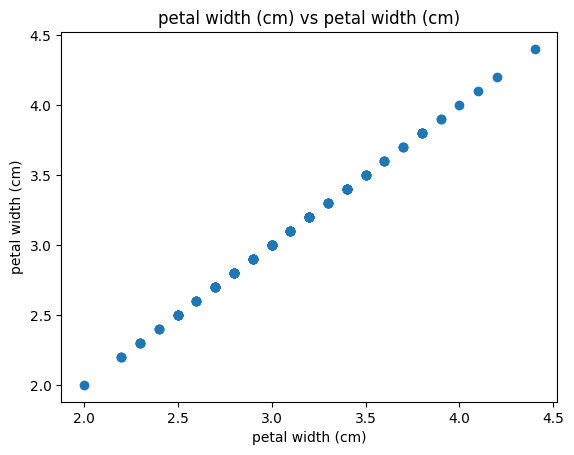

In [ ]:
li_names = iris.columns

# Create scatter plots with labels
for i, gp in enumerate(li):
    for j, gp2 in enumerate(li):
        plt.scatter(gp, gp2)
        plt.xlabel(li_names[i])
        plt.ylabel(li_names[j])
        plt.title(f'{li_names[i]} vs {li_names[j]}')
        plt.show()


In [ ]:
df0 = iris[0:50]
df1 = iris[51:100]
df2 = iris[101:150]

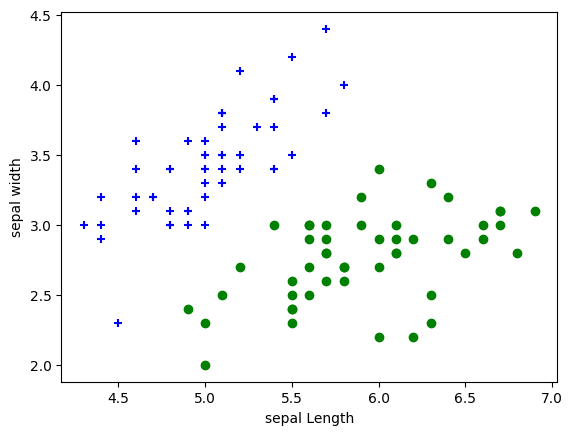

In [ ]:
plt.xlabel("sepal Length")
plt.ylabel("sepal width")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker = "+",color ='b')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker = "o",color ='g')

In [ ]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Experiment with different k values
for k in range(1, 20):
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = np.sum(predictions == y_test) / len(y_test)
    print(f"k = {k}, Accuracy = {accuracy}")


k = 1, Accuracy = 0.9777777777777777
k = 2, Accuracy = 0.9777777777777777
k = 3, Accuracy = 0.9694444444444444
k = 4, Accuracy = 0.975
k = 5, Accuracy = 0.975
k = 6, Accuracy = 0.9722222222222222
k = 7, Accuracy = 0.9722222222222222
k = 8, Accuracy = 0.975
k = 9, Accuracy = 0.9722222222222222
k = 10, Accuracy = 0.9722222222222222
k = 11, Accuracy = 0.9722222222222222
k = 12, Accuracy = 0.975
k = 13, Accuracy = 0.9722222222222222
k = 14, Accuracy = 0.9722222222222222
k = 15, Accuracy = 0.9666666666666667
k = 16, Accuracy = 0.9638888888888889
k = 17, Accuracy = 0.9666666666666667
k = 18, Accuracy = 0.9611111111111111
k = 19, Accuracy = 0.9638888888888889


In [ ]:
iris = load_iris()

In [ ]:
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=45)

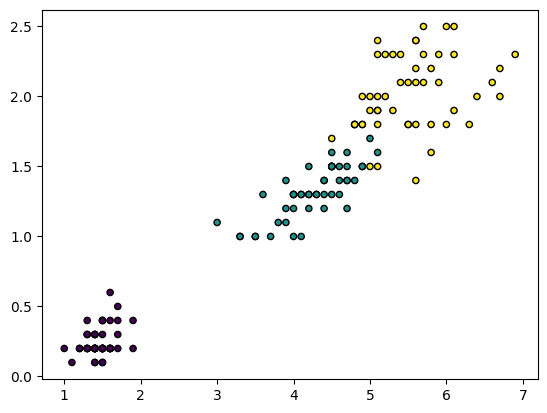

In [ ]:
plt.show()
plt.scatter(X[:,2],X[:,3],c = y,edgecolor = 'k',s =20)
plt.show()

In [ ]:
clf  = knn(k=10)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

In [ ]:
acc = np.sum(prediction == y_test) / len(y_test)
acc

0.9666666666666667